In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading In

In [21]:
#load in all of the datasets that I am responsible for and put them in one list
raw_2011 = pd.read_csv('./data/2011-crb.csv')
raw_2012 = pd.read_csv('./data/2012-crb.csv')
raw_2013 = pd.read_csv('./data/2013-crb.csv')
raw_2014 = pd.read_csv('./data/2014-crb.csv')
raw_2015 = pd.read_csv('./data/2015-crb.csv')
raw_2016 = pd.read_csv('./data/2016-crb.csv')
raw_2017 = pd.read_csv('./data/2017-crb.csv')
raw_2018 = pd.read_csv('./data/2018-crb.csv')
raw_2019 = pd.read_csv('./data/2019-crb.csv')
raw_2020 = pd.read_csv('./data/2020-crb.csv')
raw_2021 = pd.read_csv('./data/2021-crb.csv')
datalist = [raw_2011, raw_2012, raw_2013, raw_2014, raw_2015, raw_2016, raw_2017, raw_2018, raw_2019, raw_2020, raw_2021]

In [22]:
#quick look at one year's data
raw_2011.head()

,Lat,Long,YYYYMMDD,Basin_name,Station_id,Acton_id,Station_name,Elevation,Wteq_amt,Wteq_med,Wteq_amt_pct_med,Wteq_amt_pct_med_flag,Prec_wytd_amt,Prec_wytd_avg,Prec_wytd_pctavg,Prec_wytd_pct_avg_flag,
0,48.566667,-115.450000,20110210.0,KOOTENAI RIVER IN MONTANA,311,15A08S,Banfield Mountain,5600,12.1,12.2,99.0,NaN,17.5,17.8,98.0,NaN,NaN
1,48.300000,-116.066667,20110210.0,KOOTENAI RIVER IN MONTANA,323,16A08S,Bear Mountain,5400,37.4,38.6,97.0,NaN,54.2,49.5,109.0,NaN,NaN
2,48.983333,-115.816667,20110210.0,KOOTENAI RIVER IN MONTANA,918,15A05S,Garver Creek,4250,7.7,6.9,112.0,NaN,12.2,12.9,95.0,NaN,NaN
3,48.916667,-114.766667,20110210.0,KOOTENAI RIVER IN MONTANA,500,14A11S,Grave Creek,4300,13.1,11.4,115.0,NaN,18.6,22.8,82.0,NaN,NaN
4,48.300000,-114.833333,20110210.0,KOOTENAI RIVER IN MONTANA,510,14A14S,Hand Creek,5035,9.6,7.8,123.0,NaN,14.7,11.7,126.0,NaN,NaN


In [23]:
#put it all in one big dataframe
sams_df = pd.concat(datalist)

In [24]:
sams_df.isna().sum()

Lat                        264
Long                       264
YYYYMMDD                   264
Basin_name                 264
Station_id                   0
Acton_id                   264
Station_name               264
Elevation                    0
Wteq_amt                   264
Wteq_med                   264
Wteq_amt_pct_med           177
Wteq_amt_pct_med_flag     3156
Prec_wytd_amt              264
Prec_wytd_avg              264
Prec_wytd_pctavg            69
Prec_wytd_pct_avg_flag    3264
                          3080
dtype: int64

In [25]:
sams_df.shape

(3333, 17)

In [26]:
#make all columns snakecase
sams_df.rename(mapper = str.lower, axis = 1, inplace = True)
#reset the index, since it repeats due to the concatenation
sams_df.reset_index(drop = True, inplace= True)

In [27]:
sams_df[sams_df['lat'].isna()].head()

,lat,long,yyyymmdd,basin_name,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,wteq_amt_pct_med_flag,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg,prec_wytd_pct_avg_flag,
8,NaN,NaN,NaN,NaN,KOOTENAI RIVER IN MONTANA,NaN,NaN,Basin Index (%),NaN,NaN,115.0,NaN,NaN,NaN,110.0,NaN,
26,NaN,NaN,NaN,NaN,FLATHEAD RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,144.0,NaN,NaN,NaN,127.0,NaN,
42,NaN,NaN,NaN,NaN,UPPER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,138.0,NaN,NaN,NaN,123.0,NaN,
51,NaN,NaN,NaN,NaN,BITTERROOT,NaN,NaN,Basin Index (%),NaN,NaN,124.0,NaN,NaN,NaN,122.0,NaN,
60,NaN,NaN,NaN,NaN,LOWER CLARK FORK RIVER BASIN,NaN,NaN,Basin Index (%),NaN,NaN,125.0,NaN,NaN,NaN,119.0,NaN,


In [28]:
sams_df.dropna(thresh = 6).isna().sum()

lat                          0
long                         0
yyyymmdd                     0
basin_name                   0
station_id                   0
acton_id                     0
station_name                 0
elevation                    0
wteq_amt                     0
wteq_med                     0
wteq_amt_pct_med           177
wteq_amt_pct_med_flag     2892
prec_wytd_amt                0
prec_wytd_avg                0
prec_wytd_pctavg            69
prec_wytd_pct_avg_flag    3000
                          3069
dtype: int64

In [29]:
#replacing the SNOTEL missing data codes with Nulls.
sams_df.replace({-999: None, -998:None, -997: None}, inplace= True)

In [30]:
#dropping every row with too many nulls.  What's left, we can impute.
sams_df.dropna(thresh = 12, inplace= True)

In [31]:
sams_df.isna().sum()

lat                          0
long                         0
yyyymmdd                     0
basin_name                   0
station_id                   0
acton_id                     0
station_name                 0
elevation                    0
wteq_amt                     4
wteq_med                    90
wteq_amt_pct_med           116
wteq_amt_pct_med_flag     3008
prec_wytd_amt                6
prec_wytd_avg               11
prec_wytd_pctavg            17
prec_wytd_pct_avg_flag    3008
                          3008
dtype: int64

In [32]:
#let's swap the date column from a string to an actual datetime
sams_df['yyyymmdd'] = pd.to_datetime(sams_df['yyyymmdd'], format='%Y%m%d')

In [33]:
sams_df.dtypes

lat                              float64
long                             float64
yyyymmdd                  datetime64[ns]
basin_name                        object
station_id                        object
acton_id                          object
station_name                      object
elevation                         object
wteq_amt                         float64
wteq_med                         float64
wteq_amt_pct_med                 float64
wteq_amt_pct_med_flag            float64
prec_wytd_amt                    float64
prec_wytd_avg                    float64
prec_wytd_pctavg                 float64
prec_wytd_pct_avg_flag           float64
                                  object
dtype: object

In [34]:
#change the elevation and station columns to ints as well
sams_df['elevation'] = sams_df['elevation'].map(int)
sams_df['station_id'] = sams_df['station_id'].map(int)

In [35]:
#drop the flag columns, as they are null for the entire dataset.
sams_df.drop(columns = ['wteq_amt_pct_med_flag', 'prec_wytd_pct_avg_flag', ' '], inplace = True)

In [36]:
#how many nulls are left?
sams_df.isna().sum()

lat                   0
long                  0
yyyymmdd              0
basin_name            0
station_id            0
acton_id              0
station_name          0
elevation             0
wteq_amt              4
wteq_med             90
wteq_amt_pct_med    116
prec_wytd_amt         6
prec_wytd_avg        11
prec_wytd_pctavg     17
dtype: int64

In [37]:
#building a function to do the same for all my other null features
features_to_fill = ['wteq_amt', 'wteq_med', 'wteq_amt_pct_med', 'prec_wytd_amt', 'prec_wytd_avg', 'prec_wytd_pctavg']
def null_filler(feature):
   return sams_df.groupby(by = sams_df['yyyymmdd'])[feature].transform(lambda x: x.fillna(x.median()))
    

In [38]:
for feature in features_to_fill:
    sams_df[feature] = null_filler(feature)

In [39]:
sams_df.isna().sum()

lat                 0
long                0
yyyymmdd            0
basin_name          0
station_id          0
acton_id            0
station_name        0
elevation           0
wteq_amt            0
wteq_med            0
wteq_amt_pct_med    0
prec_wytd_amt       0
prec_wytd_avg       0
prec_wytd_pctavg    0
dtype: int64

## Nulls imputed, now for some statistics

In [40]:
sams_df.describe()

,lat,long,station_id,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,45.418334,-116.424640,605.074468,5979.151928,14.972374,15.843816,95.675532,24.864894,24.864528,100.551529
std,1.852166,3.534227,175.160375,1541.654299,9.025920,8.280473,32.367827,16.230453,15.263817,22.840754
min,41.233333,-123.366667,302.000000,2060.000000,0.000000,0.000000,0.000000,3.200000,6.000000,30.000000
25%,43.950000,-119.833333,466.000000,4930.000000,8.400000,9.900000,81.000000,13.600000,14.100000,86.000000
50%,45.183333,-115.666667,608.000000,5870.000000,13.300000,14.000000,95.000000,20.400000,21.200000,99.000000
75%,46.983333,-113.950000,747.000000,7180.000000,20.100000,20.700000,113.000000,31.100000,31.700000,113.000000
max,48.983333,-110.050000,932.000000,9580.000000,64.600000,47.600000,553.000000,124.600000,99.400000,222.000000


(array([451., 999., 735., 477., 183., 102.,  50.,   8.,   2.,   1.]),
 array([ 0.  ,  6.46, 12.92, 19.38, 25.84, 32.3 , 38.76, 45.22, 51.68,
        58.14, 64.6 ]),
 <BarContainer object of 10 artists>)

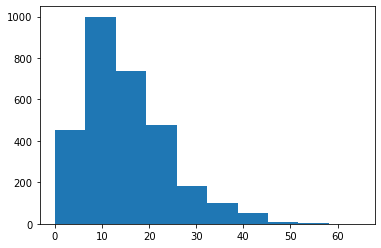

In [41]:
plt.hist(sams_df['wteq_amt'])

(array([ 99., 583., 893., 547., 406., 218., 142.,  43.,  55.,  22.]),
 array([ 0.  ,  4.76,  9.52, 14.28, 19.04, 23.8 , 28.56, 33.32, 38.08,
        42.84, 47.6 ]),
 <BarContainer object of 10 artists>)

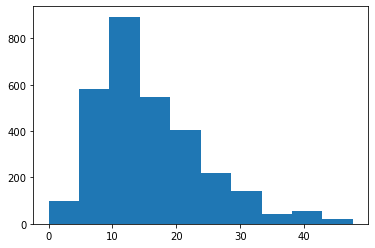

In [42]:
plt.hist(sams_df['wteq_med'])

In [44]:
sams_df.to_csv('data/sams_clean_data.csv', index = False)